<참조 : https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough?hl=ko>

## Custom training : 둘러보기
- 붓꽃 분류 문제로 모델 구축 : 모델 구현의 기본 형태
  - 모델 구축
  - 모델 훈련
  - 모델을 사용한 예측

## 절차
#### 1. 데이터 가져오기 / 분석
#### 2. 모델 타입 선정
#### 3. 모델 훈련
#### 4. 모델 효과 평가
#### 5. 훈련된 모델을 사용하여 예측하기  
    
      
  - 고수준 텐서플로 사용
    - 텐서플로의 즉시 실행(eager execution) 기본 개발 환경 사용
    - 데이터세트 API를 활용하여 데이터 가져오기
    - keras API를 활용하여 모델과 층(layer) 구축

## 붓꽃(Iris) 분류
- 붓꽃의 꽃받침과 꽃잎의 길이와 폭을 토대로 붓꽃의 품종을 분류
  - setosa
  - virginica
  - versicolor  
    
      
- 측정된 붓꽃 데이터 120개로 분류

### 01. 임포트 

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
print('텐서플로 버전: {}'.format(tf.__version__))
print('즉시 실행: {}'.format(tf.executing_eagerly()))

텐서플로 버전: 2.7.0-dev20210708
즉시 실행: True


### 02. 데이터 로드

In [3]:
# 데이터세트 다운로드
train_dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)

print('Dataset이 복사된 위치: {}'.format(train_dataset_fp))

Dataset이 복사된 위치: C:\Users\jjanh_000\.keras\datasets\iris_training.csv


In [4]:
$head -n5 {train_dataset_fp}  # 오류발생, 처음 5개 항목 확인이 안됨

SyntaxError: invalid syntax (<ipython-input-4-efdac9008b42>, line 1)

#### head 5줄의 출력 결과  
- 수치 데이터(feature)와 마지막 열(label/target)은 붓꽃의 분류  

120,4,setosa,versicolor,virginica  

6.4,2.8,5.6,2.2,2  

5.0,2.3,3.3,1.0,1  

4.9,2.5,4.5,1.7,2  

4.9,3.1,1.5,0.1,0

In [5]:
# csv 파일 안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print('특성: {}'.format(feature_names))
print('레이블: {}'.format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


#### label
  - 0 : Iris setosa
  - 1 : Iris versicolor
  - 2 : Iris virginica

In [6]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

### tf.data.Dataset
  - make_csv_dataset 함수 사용
    - 훈련 모델을 위한 데이터를 생성
    - 초기값은 셔플(shuffle=True, shuffle_buffer_size=10000)
    - 무한 반복(num_epochs=None)으로 설정  
      
        
    - (feature, label) 쌍으로 구성된 tf.data.Dataset을 반환
      - feature : 딕셔너리 객체인 {'feature_name': value}

In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

In [8]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.2, 6.2, 4.6, 4.8, 6.3, 5.7, 4.8, 6.4, 7. , 5.8, 6.3, 7.2, 7.3,
       6.8, 6.9, 4.8, 5. , 5.7, 6.4, 6.4, 5.8, 5.5, 5. , 7.7, 6.8, 5.1,
       5.7, 6.7, 4.7, 6.2, 6.7, 5.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 2.2, 3.4, 3. , 3.3, 4.4, 3. , 2.7, 3.2, 2.8, 2.3, 3. , 2.9,
       3. , 3.1, 3.4, 2. , 3. , 3.2, 3.2, 2.7, 2.6, 3.4, 3.8, 3.2, 3.5,
       2.8, 3.1, 3.2, 3.4, 3. , 3.4], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6. , 4.5, 1.4, 1.4, 6. , 1.5, 1.4, 5.3, 4.7, 5.1, 4.4, 5.8, 6.3,
       5.5, 5.1, 1.6, 3.5, 4.2, 4.5, 5.3, 5.1, 4.4, 1.5, 6.7, 5.9, 1.4,
       4.5, 5.6, 1.3, 5.4, 5.2, 1.4], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.5, 0.3, 0.1, 2.5, 0.4, 0.3, 1.9, 1.4, 2.4, 1.3, 1.6, 1.8,
       2.1, 2.3, 0.2, 1. , 1.2, 1.5, 2.3, 1.9, 1.2, 0.2, 2.2,

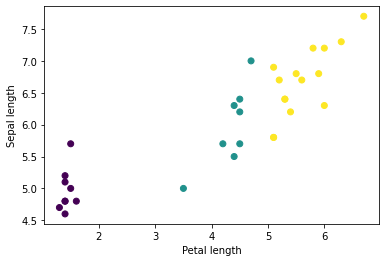

In [9]:
plt.scatter(features['petal_length'],
           features['sepal_length'],
           c=labels,
           cmap='viridis')

plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

#### pack_features_vector 함수
  - 모델 구축 단계를 단순화
    - 특성 딕셔너리를 (batch_size, num_features) 형태를 가지는 단일 배열로 재구성
  - tf.stack 메서드를 사용

In [10]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [11]:
train_dataset = train_dataset.map(pack_features_vector)

In [12]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.9 3.1 1.5 0.1]
 [6.8 3.2 5.9 2.3]
 [7.3 2.9 6.3 1.8]
 [5.  2.  3.5 1. ]
 [4.4 3.2 1.3 0.2]], shape=(5, 4), dtype=float32)


### 03. 모델 타입 선정
  - 모델 : 특성(features)과 레이블(label)과의 관계
  - 신경망(neural network) 모델
    - 신경망은 하나 또는 그 이상의 은닉층(hidden layer)으로 구성된 그래프
    - 각각의 은닉층은 하나 이상의 뉴런(neuron)으로 구성  
      
        
  - dense / fully-connected newral network 사용  
    
      
  - 모델이 훈련된 다음 레이블이 되어 있지 않은 데이터를 제공 : 레이블을 예측
    - 추론 : inference
    - Probability(확률)로 표시 

#### keras를 사용한 모델 생성
  - 활성화 함수(activation function) : ReLU 사용

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [14]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.70950603, -0.2144442 , -0.48088205],
       [ 2.1663373 , -1.2927195 , -3.3201587 ],
       [ 2.3641922 , -1.4015484 , -3.551595  ],
       [ 1.316179  , -0.77418905, -2.1521018 ],
       [-0.8792841 , -0.14047888, -0.25194544]], dtype=float32)>

#### 각 샘플은 각 클래스에 대한 로짓(logit)을 반환
  - 이 로짓을 각 클래스에 대한 확률로 변환
    - 소프트맥스(softmax) 함수 사용

In [15]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.25657678, 0.42093977, 0.32248348],
       [0.9656222 , 0.03037792, 0.00399993],
       [0.9748043 , 0.02256717, 0.0026286 ],
       [0.86594164, 0.10706643, 0.0269919 ],
       [0.20136717, 0.42154863, 0.37708423]], dtype=float32)>

In [16]:
print('  예측: {}',format(tf.argmax(predictions, axis=1)))
print('레이블: {}'.format(labels))

  예측: {} [1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
레이블: [0 2 2 1 0 2 2 2 0 2 0 1 0 2 2 0 2 1 2 0 1 1 1 1 1 1 1 2 0 1 2 0]


### 04. 모델 훈련 : Model Training
  - 모델이 점진적으로 최적화되거나 데이터셋을 학습하는 머신러닝 과정
  - 훈련의 목적
    - 미지의 데이터를 예측하기 위해 훈련 데이터셋의 구조에 대해서 충분히 학습
    - 과대적합(Overfitting) : 훈련 데이터에 대해 과하게 학습된 상태
      - 훈련데이터에 대한 예측의 정확도는 높으나 미지의 데이터에 대한 예측의 정확도가 낮은 경우
      - 문제를 이해하고 해결하는 것이 아니라 답을 기억하고 있는 것과 같은 형태  
        
          
  - 학습 형태
    - 지도학습(supervised machine learning) : 모델이 레이블을 포함한 훈련데이터로 학습
    - 비지도학습(unsupervised machine learning) : 훈련데이터가 레이블을 포함하고 있지 않은 경우
      - 대신 특성 산의 패턴을 찾습니다

#### 손실함수와 그래디언트 함수
  - 훈련과 평가에서 모델의 손실(loss)을 계산
    - 손실은 모델의 예측과 실제 레이블이 얼마나 일치하는지
    - 모델이 잘 작동하는지에 대한 척도
    - 손실을 최소화하고 최적화해야 합니다  
      
        
  - tf.keras.losses.categorical_crossentropy 함수 사용
    - 모델의 클래스(레이블)과 예측된 값(로짓)을 입력받아 샘플의 평균 손실을 반환
   

In [17]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
def loss(model, x, y):
    y_ = model(x)
    
    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels)
print('손실 테스트: {}'.format(l))

손실 테스트: 3.2710609436035156


In [19]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

### 옵티마이저 : Optimizer
  - 손실 함수를 최소화하기 위해 계산된 그래디언트를 모델의 변수에 적용
  - 손실 함수의 최저점 탐색
    - 그래디언트(미분계수:기울기) : 가장 가파른 상승 방향을 가리키며 반대방향으로 이동
    - 각 배치마다 손실과 기울기를 반복적으로 계산하여 훈련과정 동안 모델을 조정  
      
        
        
    - 손실을 최소화하기 위해 가중치(weight)와 편향(bias)의 최적의 조합을 탐색
      
        
          
  - 최적화 알고리즘
    - 확률적 경사하강법(SGD : stochastic gradient descent)
    - 학습률(learning rate) : 경사 하강 과정의 크기를 나타내는 매개변수 / 조절가능한 하이퍼바라미터(hyperparameter)

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [21]:
loss_value, grads = grad(model, features, labels)

print('단계: {}, 초기 손실: {}'.format(optimizer.iterations.numpy(),
                                loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('단계: {},      손실: {}'.format(optimizer.iterations.numpy(),
                                  loss(model, features, labels).numpy()))

단계: 0, 초기 손실: 3.2710609436035156
단계: 1,      손실: 2.6644670963287354


### 모델 훈련

In [22]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    for x, y in train_dataset:
        # 모델을 최적화 합니다
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg(loss_value)
        
        epoch_accuracy(y, model(x))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print('에포크 {:03d}: 손실: {:.3f}, 정확도: {:.3%}'.format(epoch,
                                             epoch_loss_avg.result(),
                                             epoch_accuracy.result()))

에포크 000: 손실: 2.040, 정확도: 22.500%
에포크 050: 손실: 0.098, 정확도: 98.333%
에포크 100: 손실: 0.060, 정확도: 99.167%
에포크 150: 손실: 0.055, 정확도: 98.333%
에포크 200: 손실: 0.059, 정확도: 98.333%


### 시간에 따른 손실함수 시각화
  - 텐서보드 : tensorboard

C:\Users\jjanh_000\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjanh_000\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjanh_000\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjanh_000\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjanh_000\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jjanh_000\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Gl

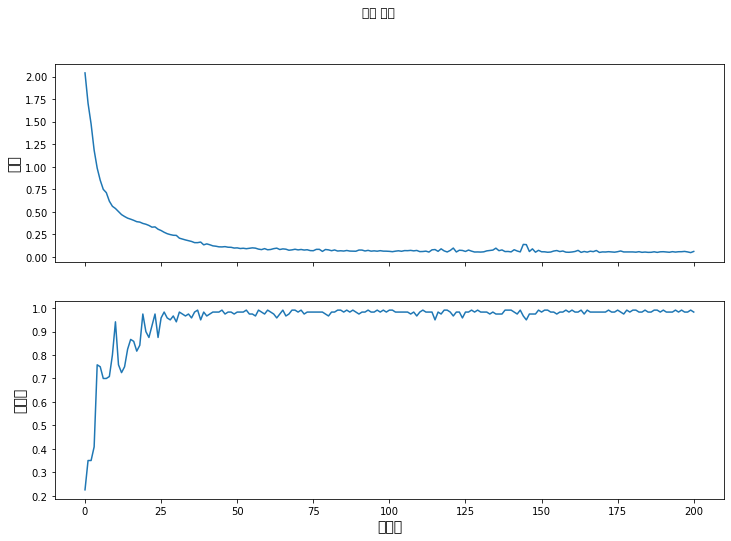

In [24]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('훈련 지표')

axes[0].set_ylabel('손실', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('정확도', fontsize=14)
axes[1].set_xlabel('에포크', fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

### 05. 모델 유효성 평가

In [25]:
test_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                 origin=test_url)

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0s/step


In [26]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False
)

test_dataset = test_dataset.map(pack_features_vector)

In [27]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
    
print('테스트 세트 정확도: {:.3%}'.format(test_accuracy.result()))

테스트 세트 정확도: 96.667%


In [28]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

### 06. 훈련된 모델로 예측하기

In [29]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1,]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    print('샘플 {} 예측: {} ({:4.1f}%)'.format(i, name, 100*p))

샘플 0 예측: Iris setosa (99.7%)
샘플 1 예측: Iris versicolor (99.9%)
샘플 2 예측: Iris virginica (98.4%)
